<a href="https://colab.research.google.com/github/hoyathali/Machine-Learning-Repo/blob/main/Forecasting_Sleep_Efficiency_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting Sleep Efficiency**:  A Machine Learning Model integrated with Lifestyle Factors.

---

> **Introduction:**
  This project predicts sleep efficiency, a crucial measure beyond sleep duration, using machine learning. It explores how demographic and lifestyle factors, such as age, gender, bedtime, and choices like caffeine intake, influence sleep efficiency. Motivated by the profound impact of sleep on health, the study aims to provide personalized insights.
  
>  The structured approach involves data exploration, feature engineering, model selection, and evaluation, providing accurate predictions and insights into key factors. This research contributes to sleep science, benefiting healthcare professionals and individuals seeking to optimize well-being.




# **Exploring Dataset**

In [59]:
# We will be using pandas libarry for data manipulation and analysis
import pandas as pd

In [60]:
# Read the dataset in CSV format from the repository Link
file_link = f'https://drive.google.com/uc?id=18auR1F2cDay50Q2AwE5tbaJPCvs71M0q'
df=pd.read_csv(file_link)

In [61]:
# Lets have a quick peek at the structure of data
df. head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0



> **We can notice that the data has non numerical columns like Gender/smoking habits. As ML models work on numerical data we will be cleaning it futher.**







# **Data Cleaning and Pre processing**

---


> 1.   **Performing one hot encoding on columns of Gender and Smoking**







In [62]:
# Lets add two new columns GenderInfo and smoking by encoding text values to 0,1
df['GenderInfo']=df['Gender'].apply(lambda X:1 if X=='Male' else 0)
df['smoking'] = df['Smoking status'].apply(lambda x:1 if x == 'Yes' else 0)
# Lets have a look at our changes
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,GenderInfo,smoking
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,0,1
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,1,1
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,0,0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,0,1
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,1,0




> **2. From Bedtime and Wakeup time lets extract the hour of time as this is more relavent than the date**



In [63]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%Y-%m-%d %H:%M:%S')
df['Wakeup time']=pd.to_datetime(df['Wakeup time'],format='%Y-%m-%d %H:%M:%S')

# Extracting just the hour and storing it in new columns
df['Bedhour'] = df['Bedtime'].dt.hour
df['Wakehour']=df['Wakeup time'].dt.hour



> **3. Remove irrelavent/Unwanted columns**

Gender and smoking status - As we have hot encoded it

Bedtime and Wakeuptime    - As we have extracted the hours and stored in Bedhour and Wake hour columns.
And also ID column



In [64]:
# Drop these columns
df.drop(['ID','Gender','Bedtime','Wakeup time','Smoking status'],axis='columns', inplace=True)
# Verify the shape of our datasest after dropping and have a quick look
df.shape
df.head()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,GenderInfo,smoking,Bedhour,Wakehour
0,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,0,1,1,7
1,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,1,1,2,9
2,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,0,0,21,5
3,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,0,1,2,8
4,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,1,9


> **3. Cleaning data with missing values** (Where we might have null values)


In [65]:
df.dropna(inplace=True)
df.shape

(388, 14)



> 4.  **Finding and handling outliers**

lets plot box plots for all the features to see if there are any outliers in the dataset



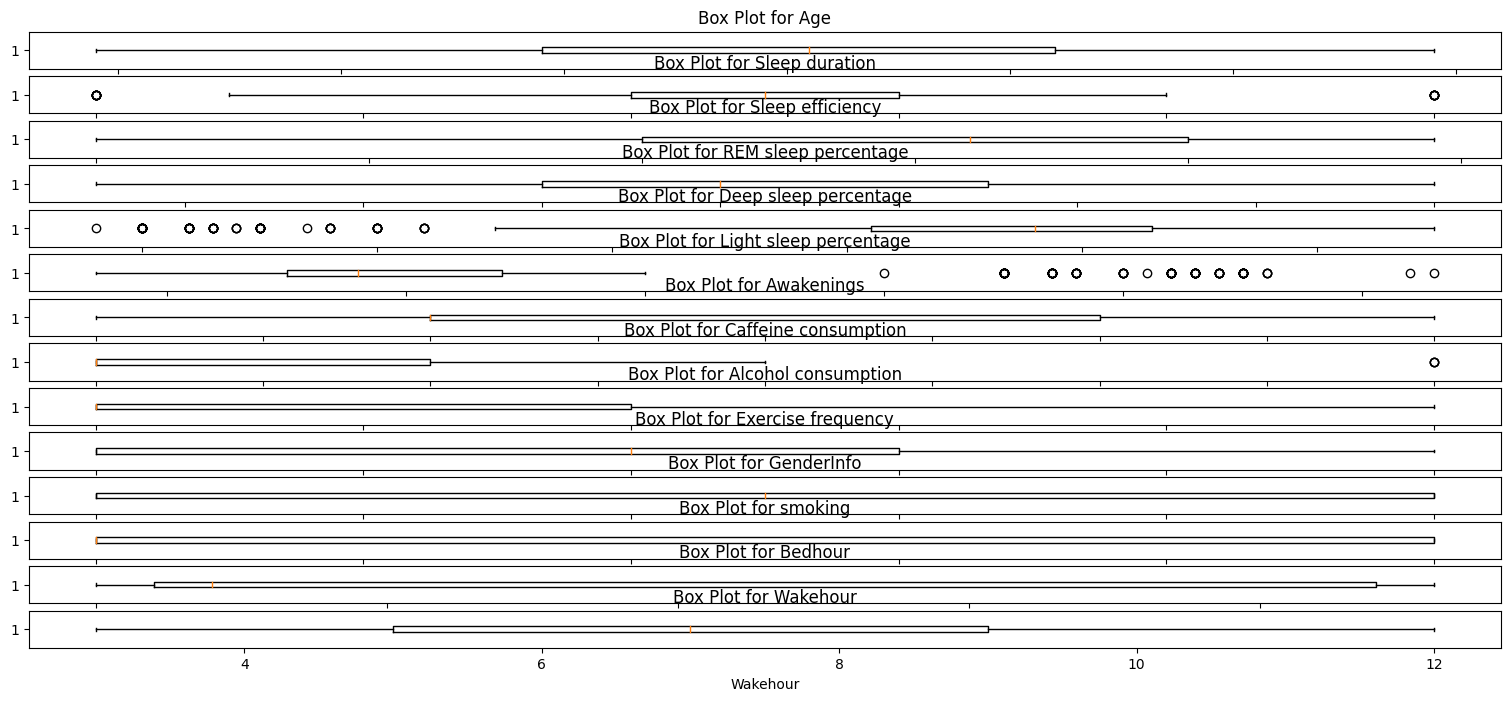

In [66]:
# Import matplotlib for plotting the chart
import matplotlib.pyplot as plt

#Select the columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Set the size of the chart
plt.figure(figsize=(19, 8))

# Loop over the features and plot the chart for all features
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i+1)
    plt.boxplot(df[feature], vert=False)
    plt.title(f'Box Plot for {feature}')
    plt.xlabel(feature)

plt.show()





> We can notice that there are some outliers in the data I.e. in Caffeine consumption, sleep duration and light sleep percentages. We will be using Interquartile Range (IQR) method for cleaning the outliers





In [67]:
# Calculate the 20th percentile (Q1), 80th percentile (Q3), and Interquartile Range (IQR)
Q1 = df.quantile(0.2)
Q3 = df.quantile(0.8)
IQR = Q3 - Q1

# Display the shape of the dataframe before removing outliers
print("The shape of the dataframe before removing the outliers is " + str(df.shape))

# Remove outliers from the dataframe using the IQR method
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display the shape of the dataframe after removing outliers
print("The shape of the dataframe after removing the outliers is " + str(df_cleaned.shape))


The shape of the dataframe before removing the outliers is (388, 14)
The shape of the dataframe after removing the outliers is (370, 14)


# **Separating Train and Test data**


In [68]:
#Import train_test_split library for dividing the data
from sklearn.model_selection import train_test_split

#Lets seperate features and dependent variables.
outcome=['Sleep efficiency']

#Store all the features in X
X=df_cleaned.drop(outcome, axis='columns')
#Store the dependent in Y
Y=df_cleaned[outcome]

#Perform train and test data split (80:20) ratio
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=3897)

# **Feature Engineering**
To enhance model performance, let's identify and eliminate correlated features among our independent variables, as redundant features may not substantially contribute to our model.

> Plotting a correlation matrix to visualize the correlation of our features


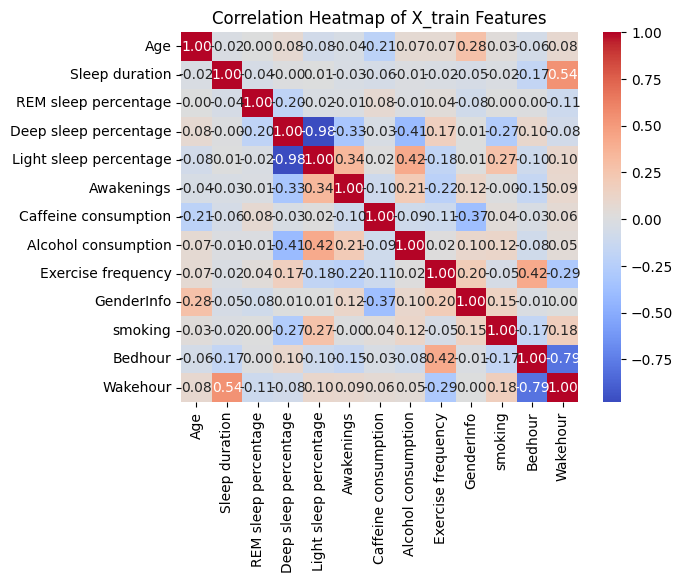

In [69]:
# Import seaborn for plotting the graphs
import seaborn as sns

# Calculate the correlation matrix for our feature columns
corr_matrix = X_train.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of X_train Features')
plt.show()

* We can notice that Light Sleep Percentage and Deep sleep percentage are correlated and the value is -0.98 which means they are inversely proportional. We can get rid of one of them. And wakehour and bedhour are also closely correlated.
* So we can eliminate 2 of the four features

In [70]:
# Drop these unwanted columns from both train and test data inplace
X_train.drop(['Wakehour','Deep sleep percentage'],axis='columns', inplace=True)
X_test.drop(['Wakehour','Deep sleep percentage'],axis='columns', inplace=True)


# **Normalizing data**


> Let's assess data variation (ranges) to determine the need for normalization.





In [71]:
X_train.describe()

,Age,Sleep duration,REM sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,GenderInfo,smoking,Bedhour
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,40.847973,7.464527,22.550676,24.361486,1.621622,20.270270,1.125000,1.797297,0.506757,0.317568,10.804054
std,13.427793,0.768837,3.367461,15.284901,1.389576,24.243006,1.592754,1.477329,0.500801,0.466319,10.577340
min,9.000000,5.500000,15.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,20.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,41.000000,7.500000,22.000000,18.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000
75%,52.000000,8.000000,25.000000,22.000000,3.000000,50.000000,2.000000,3.000000,1.000000,1.000000,22.000000
max,69.000000,9.000000,30.000000,63.000000,4.000000,100.000000,5.000000,5.000000,1.000000,1.000000,23.000000




> **We can see that the features are having wide ranges some haveing 0-1 and some have 7-63. So lets normalize our data**





In [72]:
# import MinMaxScalar to perform nomralization of data
from sklearn.preprocessing import MinMaxScaler

scalar=MinMaxScaler()

#Normalize train and test data
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)
X_train_scaled

array([[0.85      , 1.        , 0.46666667, ..., 0.        , 0.        ,
        0.08695652],
       [0.55      , 0.71428571, 0.53333333, ..., 0.        , 0.        ,
        0.08695652],
       [0.38333333, 0.57142857, 0.53333333, ..., 1.        , 0.        ,
        0.08695652],
       ...,
       [0.53333333, 0.71428571, 0.33333333, ..., 1.        , 1.        ,
        0.95652174],
       [0.75      , 0.71428571, 0.8       , ..., 1.        , 0.        ,
        0.04347826],
       [0.86666667, 0.42857143, 0.33333333, ..., 0.        , 1.        ,
        0.08695652]])

# **Choosing and Training the Model**


>  Lets evaluate the best model for our usecase by quickly comparing different types



In [73]:
# Import packages for all the models and error metrics
import warnings
import lightgbm as lgb
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=UserWarning)

feature_names = X_train.columns.tolist()

#0 Perform Mean squared error for Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, Y_train.values.ravel())
y_pred_rf = rf_model.predict(X_test_scaled)
mse = mean_squared_error(Y_test, y_pred_rf)
# Print MSE
print('Random Forest regressor Mean Squared Error         :', mse)

#1 Perform Mean squared error for LGBMRegressor
lgb_model = lgb.LGBMRegressor(objective='regression', metric='mse', boosting_type='gbdt', num_leaves=31, learning_rate=0.05, verbose =-1)
lgb_model.fit(X_train, Y_train.values.ravel())
y_pred_lgb = lgb_model.predict(X_test_scaled)
mse_lgb = mean_squared_error(Y_test, y_pred_lgb)
print('LightGBM regressor Mean Squared Error              :', mse_lgb)

#2 Perform Mean squared error for AdaBoost
base_model = lgb.LGBMRegressor(objective='regression', metric='mse', boosting_type='gbdt', num_leaves=31, learning_rate=0.05 ,verbose = -1)
ada_model = AdaBoostRegressor(base_model, random_state=42, n_estimators=50, learning_rate=0.1)
ada_model.fit(X_train, Y_train.values.ravel())
y_pred_ada = ada_model.predict(X_test_scaled)
mse_ada = mean_squared_error(Y_test, y_pred_ada)
# Print MSE
print('AdaBoosted LightGBM regressor Mean Squared Error   :', mse_ada)

#3 Perform Mean squared error for Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
mse_linear = mean_squared_error(Y_test, y_pred_linear)
# Print MSE
print('Linear Regression Mean Squared Error               :', mse_linear)

# Compare MSE and select the best model
best_model = min([('Random Forest', mse),('Linear Regression', mse_linear), ('LightGBM', mse_lgb), ('AdaBoosted LightGBM', mse_ada)], key=lambda x: x[1])
print(f'Best model is {best_model[0]} with Mininum MSE       : {best_model[1]}')


Random Forest regressor Mean Squared Error         : 0.0017539549108108116
LightGBM regressor Mean Squared Error              : 0.0176929883153439
AdaBoosted LightGBM regressor Mean Squared Error   : 0.018428182512046747
Linear Regression Mean Squared Error               : 0.02204559456968339
Best model is Random Forest with Mininum MSE       : 0.0017539549108108116



# **Fine Tuning Hyper Parameters**


> Random Forest seems to be goot fit for the usecase. Lets proceed forward with Random Forest and optimize it further



> Lets perform parameter tuning using GridSearchCV to choose the parameters that would give us the best results


In [74]:
# Import GridSearchCV and RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    }

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train.values.ravel())

# Get the best parameters
best_params = grid_search.best_params_

# Create a Random Forest regressor with the best parameters
best_rf_model = RandomForestRegressor(random_state=42, **best_params)
best_rf_model.fit(X_train_scaled, Y_train.values.ravel())


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)



> Lets make some predictions using our model to evaulate the Error





In [75]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the Random Forest regressor (using mean squared error as an example)
mse = mean_squared_error(Y_test, y_pred)
print('Random Forest regressor Mean Squared Error:', mse)


Random Forest regressor Mean Squared Error: 0.0017419044416419806


# **Visualizing most influencing features from our model**

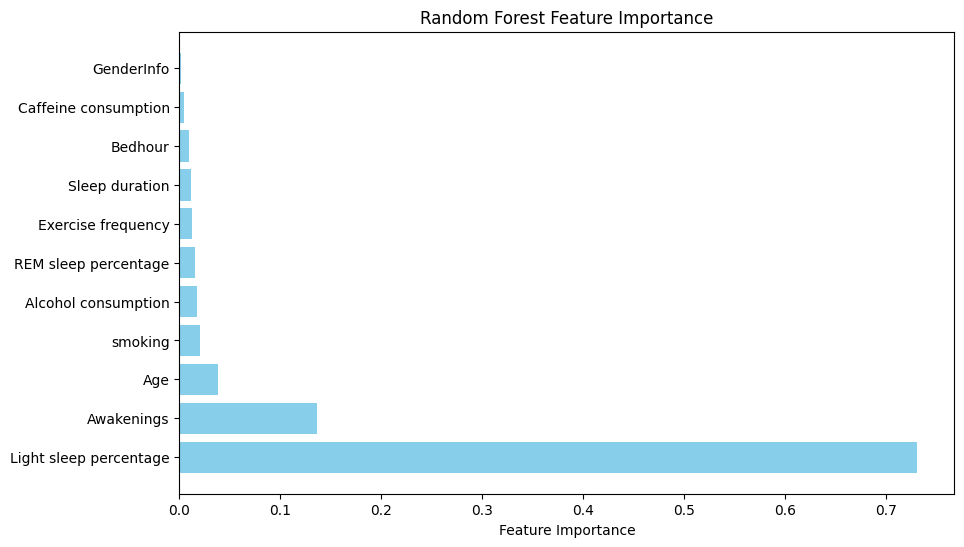

In [76]:
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_

feature_importance_dict = dict(zip(X_train.columns, feature_importances))

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)   # Sort features by importance in descending order
features, importance = zip(*sorted_features)                                                  # Extract feature names and importance scores

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()


# **Test and evaluate the Model**


> Lets test and evaluate our models predictions agains the expected data

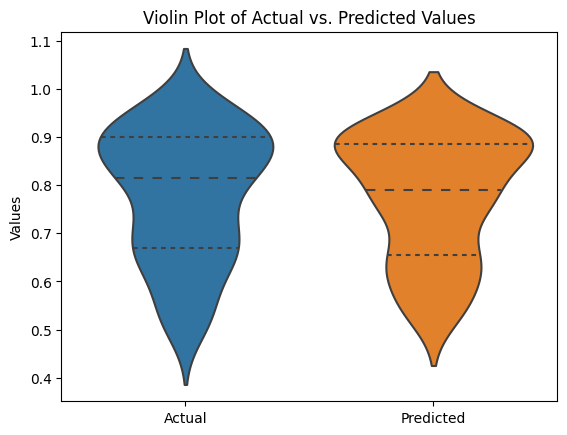

In [77]:
# Combine actual and predicted values into a single DataFrame
df_violin = pd.DataFrame({'Actual': Y_test.values.ravel(), 'Predicted': y_pred})

# Create a violin plot
sns.violinplot(data=df_violin, inner="quartile")
plt.title('Violin Plot of Actual vs. Predicted Values')
plt.ylabel('Values')
plt.show()


**Conclusion:**



> In summary, this project effectively used machine learning to predict sleep efficiency by analyzing demographic and lifestyle factors. The optimized Random Forest model contributes valuable insights for healthcare professionals and individuals seeking tailored strategies for improving sleep quality.



**Future Scope:**



> Moving forward, potential areas for exploration include expanding the dataset to include diverse variables, integrating advanced machine learning techniques, and collaborating with sleep experts. Further research could focus on real-time data from wearable devices and exploring the impact of interventions on sleep efficiency for more personalized strategies.

